In [3]:
import tensorflow as tf  
import torch
tf.test.gpu_device_name()
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [5]:
import numpy as np
import random
import os
import pandas as pd
from scipy import signal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import random
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
#%%Experiemnt 1
# Location of Matlab File
os.chdir(r'C:\Research\Spring 2023\05_04_2022\Stage Wise Experiment Analysis\Experiment 1')
from scipy.io import loadmat
#Loading Data
mat_1 = loadmat('Stage-1-Mar-28-2023-Run01_1.mat')
sorted(mat_1.keys())
#To Array
oct_a_1 = mat_1['Y1']
oct_a_1 = oct_a_1.reshape(len(oct_a_1), )
mat = loadmat('Stage-1-Mar-28-2023-Run01_2.mat')
sorted(mat.keys())
#To Array
oct_a_2 = mat['Y2']
oct_a_2 = oct_a_2.reshape(len(oct_a_2), )
oct_a_expt_1 = np.concatenate((oct_a_1, oct_a_2))

#Experiment 2
# Location of Matlab File
os.chdir(r'C:\Research\Spring 2023\05_04_2022\Stage Wise Experiment Analysis\Experiment 2')
from scipy.io import loadmat
mat_2 = loadmat('Stage-2-Mar-28-2023-Run02.mat')
sorted(mat_2.keys())
oct_a_expt_2 = mat_2['Y3']
oct_a_expt_2 = oct_a_expt_2.reshape(len(oct_a_expt_2), )


#Experiemnt 3
os.chdir(r'C:\Research\Spring 2023\05_04_2022\Stage Wise Experiment Analysis\Experiment 3 March 29')
#Loading Data
mat_3 = loadmat('Stage-3-Mar-29-2023-Run01.mat')
sorted(mat_3.keys())
oct_a_expt_3 = mat_3['Y']
oct_a_expt_3 = oct_a_expt_3.reshape(len(oct_a_expt_3), )

#Experiment 6
os.chdir(r'C:\Research\Spring 2023\05_04_2022\Stage Wise Experiment Analysis\Experiment 6 April 19')
mat_6 = loadmat('Stage-6-Apr-19-2023-Run01.mat')
sorted(mat_6.keys())
#To Array
oct_a_expt_6 = mat_6['y']
oct_a_expt_6 = oct_a_expt_6.reshape(len(oct_a_expt_6), )

time_step = .0001
time_vec_expt_2 = np.arange(0, 480, time_step) #Input the total seconds of the video length
time_vec_expt_1 = np.arange(0, 486.5, time_step)
time_vec_expt_3 = np.arange(0, 538.5, time_step)
time_vec_expt_6 = np.arange(0, 300, time_step)

# 1302 = (Total tine * Frame rate = 120*10.85) Total number of thermal images equivalent
split_expt_1 = np.array_split(oct_a_expt_1, 5261)
split_expt_2 = np.array_split(oct_a_expt_2, 5189)
split_expt_3 = np.array_split(oct_a_expt_3, 5885)
split_expt_6 = np.array_split(oct_a_expt_6, 3275)

#%Splitting the time stamps
time_split_expt_1 = np.array_split(time_vec_expt_1, 5261)
time_split_expt_2 = np.array_split(time_vec_expt_2, 5189)
time_split_expt_3 = np.array_split(time_vec_expt_3, 5885)
time_split_expt_6 = np.array_split(time_vec_expt_6, 3275)


#%%
#Imprting excel file contains anomolous data rows
os.chdir("C:\Research\Fall 2023\Signal Quantification Work - Thesis\LSTM Model")
interaction_event_data_1 = pd.read_excel("Shell interaction Events Data.xlsx",sheet_name="Expt 1")
interaction_event_data_2 = pd.read_excel("Shell interaction Events Data.xlsx",sheet_name="Expt 2")
interaction_event_data_3 = pd.read_excel("Shell interaction Events Data.xlsx",sheet_name="Expt 3")
interaction_event_data_6 = pd.read_excel("Shell interaction Events Data.xlsx",sheet_name="Expt 6")

Class_A_data_1 = pd.read_excel("Shells Class A Data.xlsx",sheet_name="Expt 1")
Class_A_data_2 = pd.read_excel("Shells Class A Data.xlsx",sheet_name="Expt 2")
Class_A_data_3 = pd.read_excel("Shells Class A Data.xlsx",sheet_name="Expt 3")
Class_A_data_6 = pd.read_excel("Shells Class A Data.xlsx",sheet_name="Expt 6")


interaction_event_data_row_expt_1 = interaction_event_data_1["Acc. Frame Number"].values.tolist()
interaction_event_data_row_expt_2 = interaction_event_data_2["Acc. Frame Number"].values.tolist()
interaction_event_data_row_expt_3 = interaction_event_data_3["Acc. Frame Number"].values.tolist()
interaction_event_data_row_expt_6 = interaction_event_data_6["Acc. Frame Number"].values.tolist()

Class_A_data_row_expt_1 = Class_A_data_1["Acc. Frame Number"].values.tolist()
Class_A_data_row_expt_2 = Class_A_data_2["Acc. Frame Number"].values.tolist()
Class_A_data_row_expt_3 = Class_A_data_3["Acc. Frame Number"].values.tolist()
Class_A_data_row_expt_6 = Class_A_data_6["Acc. Frame Number"].values.tolist()
#%%
interaction_events_data_expt_1 = []
for i in interaction_event_data_row_expt_1:
    interaction_events_data_expt_1.append(split_expt_1[i])
    
interaction_events_data_expt_2 = []
for i in interaction_event_data_row_expt_2:
    interaction_events_data_expt_2.append(split_expt_2[i])
    
interaction_events_data_expt_3 = []
for i in interaction_event_data_row_expt_3:
    interaction_events_data_expt_3.append(split_expt_3[i])
    
interaction_events_data_expt_6 = []
for i in interaction_event_data_row_expt_6:
    interaction_events_data_expt_6.append(split_expt_6[i])
    
Class_A_data_expt_1 = []
for i in Class_A_data_row_expt_1:
    Class_A_data_expt_1.append(split_expt_1[i])
    
Class_A_data_expt_2 = []
for i in Class_A_data_row_expt_2:
    Class_A_data_expt_2.append(split_expt_2[i])
    
Class_A_data_expt_3 = []
for i in Class_A_data_row_expt_3:
    Class_A_data_expt_3.append(split_expt_3[i])
    
Class_A_data_expt_6 = []
for i in Class_A_data_row_expt_6:
    Class_A_data_expt_6.append(split_expt_6[i])
#%% 
window_size=int(100) #(window_size=10000/frame_rate_of_video)
noverlap=int(0.5*window_size)
nfft= 8192/32

spectrograms_class_B=[]
spectrograms_class_A=[]
for i in interaction_events_data_expt_1:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_B.append(spectrogram)

for i in interaction_events_data_expt_2:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_B.append(spectrogram)
    
for i in interaction_events_data_expt_3:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_B.append(spectrogram)   

for i in interaction_events_data_expt_6:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_B.append(spectrogram)
    
for i in Class_A_data_expt_1:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_A.append(spectrogram)

for i in Class_A_data_expt_2:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_A.append(spectrogram)
    
for i in Class_A_data_expt_3:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_A.append(spectrogram)   

for i in Class_A_data_expt_6:
    freqs, times, spectrogram = signal.spectrogram(i, fs=10000, window=('hamming'),nperseg=window_size,noverlap=noverlap, nfft = nfft )
    spectrogram=spectrogram.T
    spectrograms_class_A.append(spectrogram)
#%%


# Randomly select 60 values
selected_values = random.sample(spectrograms_class_A, 100)
# Assuming class1_data and class2_data are your spectrogram lists
#class1_labels = [0] * len(spectrograms_class_A)  # E.g., "0" for class1
class1_labels = [0] * len(selected_values) 
class2_labels = [1] * len(spectrograms_class_B)  # E.g., "1" for class2

# Combine the data
#X = np.concatenate((spectrograms_class_A, spectrograms_class_B), axis=0)
X = np.concatenate((selected_values, spectrograms_class_B), axis=0)


# Combine the labels
Y = np.concatenate((class1_labels, class2_labels), axis=0)



In [8]:
X.shape

(155, 17, 129)

In [9]:
#%%%%%%%%%%%
#CNN Model Actual Code

#Splitting to train- validation - testing

from sklearn.model_selection import train_test_split

# First, split into 80% train and 20% temp (which will be further split into val and test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=2)

# Split the 20% temp data into half (10% validation and 10% test)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=2)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

X_train_reshaped = X_train.reshape(X_train.shape[0],  129, 17)
X_val_reshaped = X_val.reshape(X_val.shape[0], 129, 17)
X_test_reshaped = X_test.reshape(X_test.shape[0],  129, 17)


Training samples: 124
Validation samples: 15
Test samples: 16


In [10]:
def minus_one_to_one_normalize(data):
    return 2 * (data - np.min(data)) / (np.max(data) - np.min(data)) - 1
X_train_normalized = minus_one_to_one_normalize(X_train_reshaped)
X_val_normalized = minus_one_to_one_normalize(X_val_reshaped)
X_test_normalized = minus_one_to_one_normalize(X_test_reshaped)


In [11]:
X_train_normalized.shape

(124, 129, 17)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import RMSprop

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, GlobalAveragePooling1D, Dense, Activation

model = Sequential()

# Conv1D layers
model.add(Conv1D(2048, kernel_size=5, kernel_initializer='he_normal', padding='same', input_shape=(129, 17)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))

model.add(Conv1D(1024, kernel_size=5, kernel_initializer='he_normal', padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))

model.add(Conv1D(512, kernel_size=5, kernel_initializer='he_normal', padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))


# Global Average Pooling
model.add(GlobalAveragePooling1D())

# Dense layers
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

from keras.regularizers import l1, l2, l1_l2

# Display the model summary
model.summary()



In [ ]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="DL1.keras",
        save_best_only=True,
        monitor="val_loss")]
optimizer = RMSprop(learning_rate=0.0001, rho=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizer, loss='kullback_leibler_divergence', metrics=['accuracy'])

history = model.fit(X_train_normalized, Y_train, epochs=50, batch_size=16,  callbacks=callbacks, validation_data=(X_val_normalized, Y_val))

Train Accuracy: 88.71%


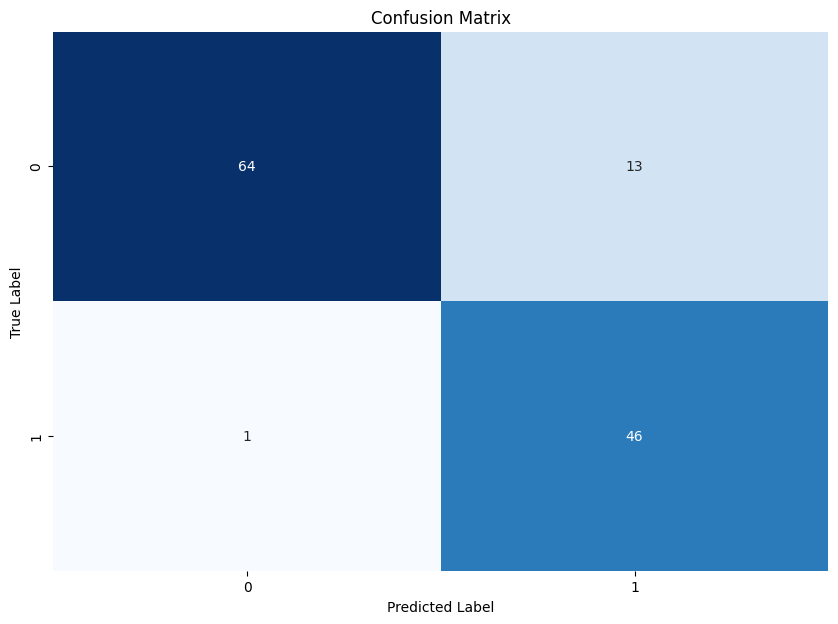

In [12]:
# Evaluate the model on the test data

test_model = keras.models.load_model(
    "DL1.keras")
loss, accuracy = test_model.evaluate(X_train_normalized, Y_train, verbose=0)

print(f"Train Accuracy: {accuracy*100:.2f}%")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data (replace with your data)

# 1. Get the model predictions
predictions = test_model.predict(X_train_normalized)

# 2. Convert predictions to class labels
# Assuming binary classification, this will threshold the predictions at 0.5
predicted_labels = np.where(predictions > 0.5, 1, 0)

# 3. Compute the confusion matrix
matrix = confusion_matrix(Y_train, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Val Accuracy: 73.33%


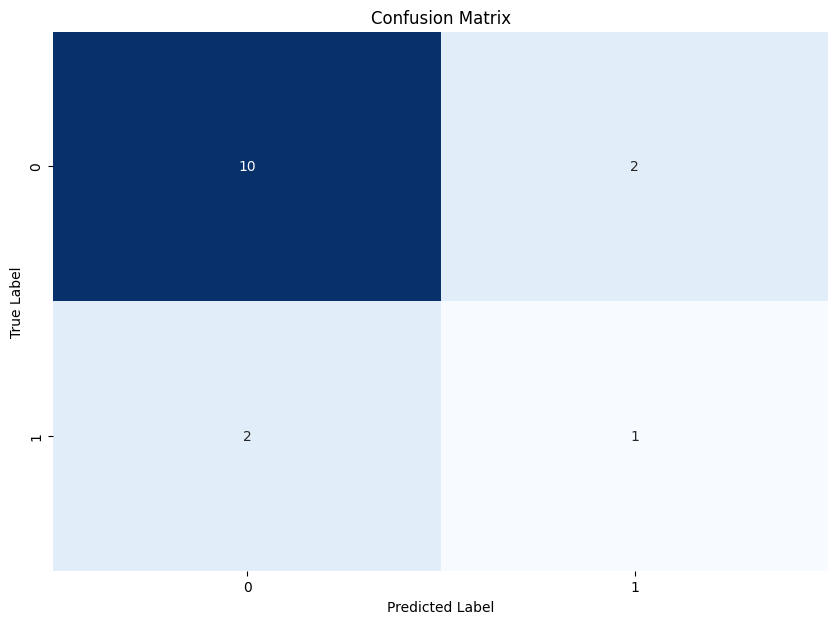

In [13]:
test_model = keras.models.load_model(
    "DL1.keras")
loss, accuracy = test_model.evaluate(X_val_normalized, Y_val, verbose=0)

print(f"Val Accuracy: {accuracy*100:.2f}%")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data (replace with your data)

# 1. Get the model predictions
predictions = test_model.predict(X_val_normalized)

# 2. Convert predictions to class labels
# Assuming binary classification, this will threshold the predictions at 0.5
predicted_labels = np.where(predictions > 0.5, 1, 0)

# 3. Compute the confusion matrix
matrix = confusion_matrix(Y_val, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Test Accuracy: 81.25%


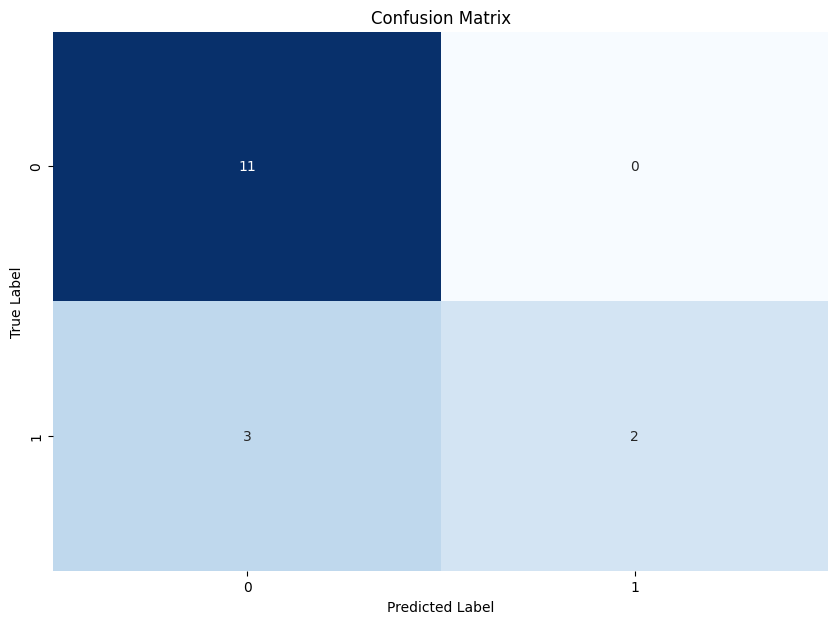

In [14]:
# Evaluate the model on the test data

test_model = keras.models.load_model(
    "DL1.keras")
loss, accuracy = test_model.evaluate(X_test_normalized, Y_test, verbose=0)

print(f"Test Accuracy: {accuracy*100:.2f}%")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data (replace with your data)

# 1. Get the model predictions
predictions = test_model.predict(X_test_normalized)

# 2. Convert predictions to class labels
# Assuming binary classification, this will threshold the predictions at 0.5
predicted_labels = np.where(predictions > 0.5, 1, 0)

# 3. Compute the confusion matrix
matrix = confusion_matrix(Y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
## LIME ANALYSIS
## Import required libraries / packages

import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import math
import scipy
import scipy.io
from PIL import Image
from scipy import ndimage
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
# import tensorflow_addons as tfa

#import pydot
#import pydotplus
#import graphviz
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import random
from keras.models import load_model
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import glob
import os
import pandas as pd

import types
from lime.utils.generic_utils import has_arg
from skimage.segmentation import felzenszwalb, slic, quickshift
import copy
from functools import partial

import sklearn
import sklearn.preprocessing
from sklearn.utils import check_random_state
from skimage.color import gray2rgb
from tqdm.auto import tqdm

import scipy.ndimage as ndi
from skimage.segmentation._quickshift_cy import _quickshift_cython

from lime import lime_base
from lime.wrappers.scikit_image import SegmentationAlgorithm

import skimage
from matplotlib import colors
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.morphology import dilation,square
from collections import Counter

In [ ]:
LX = X_train_normalized
LY = Y_train

model = keras.models.load_model("DL1.keras")
pred = model.predict(LX)

pred_class = np.where(pred > 0.5, 1, 0)
#pred_class = [1 if a < 0.5 else 0 for a in pred]
correct_X_ind = np.where(pred_class.flatten() == LY)[0]
print(correct_X_ind)


In [ ]:
import lime
from lime import lime_image
from matplotlib import pyplot as plt
fname_out = "C:\Research\Fall 2023\Signal Quantification Work - Thesis\CNN Model\LIME"

seg_fn = 'quickshift'
if seg_fn == 'quickshift':
    k_size = 5   # number of s-pixels
    num_s = 100   # number of perturbed samples
elif seg_fn == 'slic': 
    k_size = 200
    num_s = 400
    
explainer = lime_image.LimeImageExplainer()
score = []

In [ ]:
for sample_ind in correct_X_ind:
    sample = LX[sample_ind, :, :].astype('double')
    y_samp = LY[sample_ind]     # Change accordingly for different seg_fn
    explanation = explainer.explain_instance(sample, model, top_labels=2, hide_color=0, num_samples=num_s, num_features = k_size)
    score.append(explanation.score)

    if explanation.score > 0.75 and explanation.score <= 1:
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features = k_size, hide_rest=False)
        plt.figure(figsize = (12,8))
        plt.subplot(1, 2, 1)
        plt.imshow(sample)
        plt.subplot(1, 2, 2)
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        if y_samp == 0:
          plt.suptitle('No marker',fontsize= 14, fontweight = 'bold')
        else:
          plt.suptitle('With marker',fontsize= 14, fontweight = 'bold')
        plt.savefig(fname_out+'\\local results\\'+str(sample_ind)+'_LIME_topten_plot.png',dpi = 400)
        plt.close()

        # save weights and watershed/lime ratios
        weightRatio = []
        for i, e in explanation.local_exp[explanation.top_labels[0]]:
            weightRatio.append((i, e, explanation.local_pred[explanation.top_labels[0]],explanation.intercept[explanation.top_labels[0]],explanation.top_labels[0]))
  
        WR = pd.DataFrame(weightRatio)
        WR.to_csv(fname_out+ str(sample_ind)+'_weightRatioPred_score'+str(round(explanation.score,2))+'_numseg'+str(len(explanation.local_exp[explanation.top_labels[0]]))+'.csv', index = False)
        
            
score = np.array(score)
np.save(fname_out+'\\'+seg_fn+'kerns'+str(k_size)+'_nums'+str(num_s)+'score.npy',score)


In [121]:
# LIME Analysis 
import types
from lime.utils.generic_utils import has_arg
from skimage.segmentation import felzenszwalb, slic, quickshift
import copy
from functools import partial

import sklearn
import sklearn.preprocessing
from sklearn.utils import check_random_state
from skimage.color import gray2rgb
from tqdm.auto import tqdm

import scipy.ndimage as ndi
from skimage.segmentation._quickshift_cy import _quickshift_cython

from lime import lime_base
from lime.wrappers.scikit_image import SegmentationAlgorithm

import skimage
from matplotlib import colors
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.morphology import dilation,square
from collections import Counter


class BaseWrapper(object):
    """Base class for LIME Scikit-Image wrapper
    Args:
        target_fn: callable function or class instance
        target_params: dict, parameters to pass to the target_fn
    'target_params' takes parameters required to instanciate the
        desired Scikit-Image class/model
    """

    def __init__(self, target_fn=None, **target_params):
        self.target_fn = target_fn
        self.target_params = target_params

        self.target_fn = target_fn
        self.target_params = target_params

    def _check_params(self, parameters):
        """Checks for mistakes in 'parameters'
        Args :
            parameters: dict, parameters to be checked
        Raises :
            ValueError: if any parameter is not a valid argument for the target function
                or the target function is not defined
            TypeError: if argument parameters is not iterable
         """
        a_valid_fn = []
        if self.target_fn is None:
            if callable(self):
                a_valid_fn.append(self.__call__)
            else:
                raise TypeError('invalid argument: tested object is not callable,\
                 please provide a valid target_fn')
        elif isinstance(self.target_fn, types.FunctionType) \
                or isinstance(self.target_fn, types.MethodType):
            a_valid_fn.append(self.target_fn)
        else:
            a_valid_fn.append(self.target_fn.__call__)

        if not isinstance(parameters, str):
            for p in parameters:
                for fn in a_valid_fn:
                    if has_arg(fn, p):
                        pass
                    else:
                        raise ValueError('{} is not a valid parameter'.format(p))
        else:
            raise TypeError('invalid argument: list or dictionnary expected')

    def set_params(self, **params):
        """Sets the parameters of this estimator.
        Args:
            **params: Dictionary of parameter names mapped to their values.
        Raises :
            ValueError: if any parameter is not a valid argument
                for the target function
        """
        self._check_params(params)
        self.target_params = params

    def filter_params(self, fn, override=None):
        """Filters `target_params` and return those in `fn`'s arguments.
        Args:
            fn : arbitrary function
            override: dict, values to override target_params
        Returns:
            result : dict, dictionary containing variables
            in both target_params and fn's arguments.
        """
        override = override or {}
        result = {}
        for name, value in self.target_params.items():
            if has_arg(fn, name):
                result.update({name: value})
        result.update(override)
        return result


class SegmentationAlgorithm(BaseWrapper):
      """ Define the image segmentation function based on Scikit-Image
           implementation and a set of provided parameters
          Args:
             algo_type: string, segmentation algorithm among the following:
                 'quickshift', 'slic', 'felzenszwalb'
             target_params: dict, algorithm parameters (valid model paramters
                 as define in Scikit-Image documentation)
      """

def __init__(self, algo_type, **target_params):
       
    self.algo_type = algo_type
    if (self.algo_type == 'quickshift'):
            BaseWrapper.__init__(self, quickshift, **target_params)
            kwargs = self.filter_params(quickshift)
            self.set_params(**kwargs)
    elif (self.algo_type == 'felzenszwalb'):
            BaseWrapper.__init__(self, felzenszwalb, **target_params)
            kwargs = self.filter_params(felzenszwalb)
            self.set_params(**kwargs)
    elif (self.algo_type == 'slic'):
            BaseWrapper.__init__(self, slic, **target_params)
            kwargs = self.filter_params(slic)
            self.set_params(**kwargs)

def __call__(self, *args):
    return self.target_fn(args[0], **self.target_params)



class ImageExplanation(object):
    def __init__(self, image, segments):
        """Init function.
        Args:
            image: 3d numpy array
            segments: 2d numpy array, with the output from skimage.segmentation
        """
        self.image = image
        self.segments = segments
        self.intercept = {}
        self.local_exp = {}
        self.local_pred = None

    def get_image_and_mask(self, label, positive_only=True, negative_only=False, hide_rest=False,
                           num_features=5, min_weight=0.):
        """Init function.
        Args:
            label: label to explain
            positive_only: if True, only take superpixels that positively contribute to
                the prediction of the label.
            negative_only: if True, only take superpixels that negatively contribute to
                the prediction of the label. If false, and so is positive_only, then both
                negativey and positively contributions will be taken.
                Both can't be True at the same time
            hide_rest: if True, make the non-explanation part of the return
                image gray
            num_features: number of superpixels to include in explanation
            min_weight: minimum weight of the superpixels to include in explanation
        Returns:
            (image, mask), where image is a 3d numpy array and mask is a 2d
            numpy array that can be used with
            skimage.segmentation.mark_boundaries
        """
        if label not in self.local_exp:
            raise KeyError('Label not in explanation')
        if positive_only & negative_only:
            raise ValueError("Positive_only and negative_only cannot be true at the same time.")
        segments = self.segments
        image = self.image
        exp = self.local_exp[label]
        mask = np.zeros(segments.shape, segments.dtype)
        if hide_rest:
            temp = np.zeros(self.image.shape)
        else:
            temp = self.image.copy()
        if positive_only:
            fs = [x[0] for x in exp
                  if x[1] > 0 and x[1] > min_weight][:num_features]
        if negative_only:
            fs = [x[0] for x in exp
                  if x[1] < 0 and abs(x[1]) > min_weight][:num_features]
        if positive_only or negative_only:
            for f in fs:
                temp[segments == f] = image[segments == f].copy()
                mask[segments == f] = 1
            return temp, mask
        else:
            for f, w in exp[:num_features]:
                if np.abs(w) < min_weight:
                    continue
                c = 0 if w < 0 else 1
                mask[segments == f] = -1 if w < 0 else 1
                temp[segments == f] = image[segments == f].copy()
                temp[segments == f, c] = np.max(image)
            return temp, mask


class LimeImageExplainer(object):
    """Explains predictions on Image (i.e. matrix) data.
    For numerical features, perturb them by sampling from a Normal(0,1) and
    doing the inverse operation of mean-centering and scaling, according to the
    means and stds in the training data. For categorical features, perturb by
    sampling according to the training distribution, and making a binary
    feature that is 1 when the value is the same as the instance being
    explained."""

    def __init__(self, kernel_width=.25, kernel=None, verbose=False,
                 feature_selection='auto', random_state=None):
        """Init function.
        Args:
            kernel_width: kernel width for the exponential kernel.
            If None, defaults to sqrt(number of columns) * 0.75.
            kernel: similarity kernel that takes euclidean distances and kernel
                width as input and outputs weights in (0,1). If None, defaults to
                an exponential kernel.
            verbose: if true, print local prediction values from linear model
            feature_selection: feature selection method. can be
                'forward_selection', 'lasso_path', 'none' or 'auto'.
                See function 'explain_instance_with_data' in lime_base.py for
                details on what each of the options does.
            random_state: an integer or numpy.RandomState that will be used to
                generate random numbers. If None, the random state will be
                initialized using the internal numpy seed.
        """
        kernel_width = float(kernel_width)

        if kernel is None:
            def kernel(d, kernel_width):
                return np.sqrt(np.exp(-(d ** 2) / kernel_width ** 2))

        kernel_fn = partial(kernel, kernel_width=kernel_width)

        self.random_state = check_random_state(random_state)
        self.feature_selection = feature_selection
        self.base = lime_base.LimeBase(kernel_fn, verbose, random_state=self.random_state)

    def explain_instance(self, image, classifier_fn, labels=(1,),
                         hide_color=0,
                         top_labels=5, num_features=10000, num_samples=1000,
                         batch_size=10,
                         segmentation_fn=None, k_size = 100,
                         stack = 20,
                         distance_metric='cosine',
                         model_regressor=None,
                         random_seed=None):
        global  yuhao_exp 
        global  yuhao_score 
        global  yuhao_origpred 
        global  yuhao_label
        global  yuhao_distance
        global  yuhao_segment
        global  yuhao_data
        """Generates explanations for a prediction.
        First, we generate neighborhood data by randomly perturbing features
        from the instance (see __data_inverse). We then learn locally weighted
        linear models on this neighborhood data to explain each of the classes
        in an interpretable way (see lime_base.py).
        Args:
            image: 3 dimension RGB image. If this is only two dimensional,
                we will assume it's a grayscale image and call gray2rgb.
            classifier_fn: classifier prediction probability function, which
                takes a numpy array and outputs prediction probabilities.  For
                ScikitClassifiers , this is classifier.predict_proba.
            labels: iterable with labels to be explained.
            hide_color: TODO
            top_labels: if not None, ignore labels and produce explanations for
                the K labels with highest prediction probabilities, where K is
                this parameter.
            num_features: maximum number of features present in explanation
            num_samples: size of the neighborhood to learn the linear model
            batch_size: TODO
            distance_metric: the distance metric to use for weights.
            model_regressor: sklearn regressor to use in explanation. Defaults
            to Ridge regression in LimeBase. Must have model_regressor.coef_
            and 'sample_weight' as a parameter to model_regressor.fit()
            segmentation_fn: SegmentationAlgorithm, wrapped skimage
            segmentation function
            random_seed: integer used as random seed for the segmentation
                algorithm. If None, a random integer, between 0 and 1000,
                will be generated using the internal random number generator.
        Returns:
            An ImageExplanation object (see lime_image.py) with the corresponding
            explanations.
        """
        if len(image.shape) == 3:
            image = gray2rgb(image)
        if random_seed is None:
            random_seed = self.random_state.randint(0, high=1000)

        if segmentation_fn is None:
             segmentation_fn = SegmentationAlgorithm('felzenszwalb', scale=50, sigma=0.8, min_size = 2, multichannel=True)
#             segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=1,
#                                                    max_dist=5, ratio=0.2,
#                                                    random_seed=random_seed)
            # segmentation_fn = SegmentationAlgorithm('slic',n_segments=k_size, compactness=1000, max_iter=5, sigma=0.8, channel_axis = -1)
        # try:
          #  segmentation_fn = SegmentationAlgorithm('slic',n_segments=k_size, compactness=1000, max_iter=5, sigma=0.8, channel_axis = -1)
          #  segments = segmentation_fn(image)
             # segments = np.arange(0,k_size).reshape((int(np.sqrt(k_size)),int(np.sqrt(k_size))))
             segments = np.arange(0,k_size).reshape(C1, C2)
             yuhao_segment = segments 
        # except ValueError as e:
        #     raise e

        fudged_image = image.copy()
        print("fudged image shape", fudged_image.shape)
        if hide_color is None:
            for x in np.unique(segments):
                fudged_image[segments == x] = (
                    np.mean(image[segments == x][:, 0]),
                    np.mean(image[segments == x][:, 1]),
                    np.mean(image[segments == x][:, 2]))
        else:
            fudged_image[:] = hide_color

        top = labels

        data, labels = self.data_labels(image, fudged_image, segments, stack,
                                        classifier_fn, num_samples,
                                        batch_size=batch_size)
        yuhao_data = data

        distances = sklearn.metrics.pairwise_distances(
            data,
            data[0].reshape(1, -1),
            metric=distance_metric
        ).ravel()
        yuhao_distance = distances

        ret_exp = ImageExplanation(image, segments)
        if top_labels:
            top = np.argsort(labels[0])[-top_labels:]
            ret_exp.top_labels = list(top)
            ret_exp.top_labels.reverse()
        for label in top:
            (ret_exp.intercept[label],
             ret_exp.local_exp[label],
             ret_exp.score, ret_exp.local_pred) = self.base.explain_instance_with_data(
                data, labels, distances, label, num_features,
                model_regressor=model_regressor,
                feature_selection='auto')
#            print(top)
            yuhao_label = labels
            yuhao_exp = ret_exp.local_exp
            yuhao_score = ret_exp.score
            yuhao_origpred = ret_exp.local_pred
#            print(ret_exp.local_exp)
#            print(ret_exp.score)
#            print(ret_exp.local_pred)
            #self.feature_selection
        return ret_exp


    def data_labels(self,
                    image,
                    fudged_image,
                    segments,
                    stack,
                    classifier_fn,
                    num_samples,
                    batch_size=10):
        """Generates images and predictions in the neighborhood of this image.
        Args:
            image: 3d numpy array, the image
            fudged_image: 3d numpy array, image to replace original image when
                superpixel is turned off
            segments: segmentation of the image
            classifier_fn: function that takes a list of images and returns a
                matrix of prediction probabilities
            num_samples: size of the neighborhood to learn the linear model
            batch_size: classifier_fn will be called on batches of this size.
        Returns:
            A tuple (data, labels), where:
                data: dense num_samples * num_superpixels
                labels: prediction probabilities matrix
        """
        global yuhao_imgs
        
        yuhao_imgs = []
        n_features = np.unique(segments).shape[0] * stack
        data = self.random_state.randint(0, 2, num_samples * n_features)\
            .reshape((num_samples, n_features))
        labels = []
        data[0, :] = 1
        imgs = []
      
        for row in tqdm(data):
            temp = copy.deepcopy(image)
            zeros = np.where(row == 0)[0]
            mask = np.zeros((segments.shape[0],segments.shape[1],stack)).astype(bool)
            #print(zeros)
            #print("mask shape:", mask.shape)
            #print("temp shape:", temp.shape)
            #print("fudged_image shape:", fudged_image.shape)
            #print("segments shape:", segments.shape)
            #print("mask shape", mask.shape)
            for z in zeros:
                #print(mask[ segments == 10%17])
                mask[segments == z%2193, int(z/2193)] = True
            temp[mask] = fudged_image[mask]
            imgs.append(temp)
            if len(imgs) == batch_size:
                preds = classifier_fn(np.array(imgs))
                labels.extend(preds)
                yuhao_imgs.append(np.array(imgs))
                imgs = []
            
        if len(imgs) > 0:
            preds = classifier_fn(np.array(imgs))
            labels.extend(preds)
            yuhao_imgs.append(np.array(imgs))
        return data, np.array(labels)


In [118]:


# seg_fn = 'slic'
# LX = np.load('cwm_markers_dataset/LX.npy')
# LY = np.load('cwm_markers_dataset/LXY.npy')

LX = X_train_normalized
LY = Y_train


print("LX shape", LX.shape)
print("LY shape", LY.shape)



model = keras.models.load_model("DL1.keras")
pred = model.predict(LX)
# LY = np.array([1 if a == 0 else 0 for a in Y])
pred_class = np.where(pred > 0.5, 1, 0)
#pred_class = [1 if a < 0.5 else 0 for a in pred]
correct_X_ind = np.where(pred_class.flatten() == LY)[0]
print(len(correct_X_ind))



LX shape (124, 129, 17)
LY shape (124,)
110


In [119]:
import lime
from lime import lime_image
from matplotlib import pyplot as plt

sam_l = 1
stack = 3  # Tensor size
C1 = 129  # NUmber of frequency bands in spectrogram
C2 = 17   # Number of time intervals in spectrogram
stack_shift = 1
window_length = 300
train_size = 0.9
n_class = 2
k_size = C1*C2
num_s = 3500   # Number of perturbations

channel = 4    # Number of data channels 
inter_period = 5400
lag = 0
fs = 2000
w_shift = int(window_length/2)
batch_size = 32
epochs = 2000   # Number of epochs
lr = 0.0002     # Learning rate

# Rename file directories 
fname_out = 'C:\Research\Fall 2023\Signal Quantification Work - Thesis\CNN Model\LIME'
data_f = fname_out +'/'+str(sam_l)+'s_continuous/inter_'+str(inter_period)+'s/with_seizure/DPGMM_C'+'/window'+str(window_length)+'/shift'+str(w_shift)
save_data_f = data_f +'/stack'+str(stack)+'_shift'+str(stack_shift)+'/scaled01'        #############
save_f = fname_out +'/'+str(n_class)+'class/CNN_best_train_lr'+str(lr)+'_epoch'+str(epochs) 


exp = LimeImageExplainer()



In [120]:
score = []
f_name1 = save_f+'/detailed_lime/numseg'+str(k_size)+'_nums'+str(num_s)+'/local results'
if not os.path.exists(f_name1):
    os.makedirs(f_name1)
from skimage.color import rgb2gray

def predict_fn(images):
    # Convert images to grayscale
    grayscale_images = [rgb2gray(image) for image in images]
    # Resize the images
    grayscale_images = np.array([resize(image, (129, 17)) for image in grayscale_images])
    # Maybe add an extra dimension if your model expects a channel dimension
    #grayscale_images = np.expand_dims(grayscale_images, axis=-1)
    # Model prediction
    predictions = model.predict(grayscale_images)
    return np.hstack((1-predictions, predictions))

for sample_ind in range(len(correct_X_ind)):
# for sample_ind in range(0,1):

    # Explain a single sample
    sample = LX[sample_ind, :, :].astype('double')
    #print(sample.shape)
    y_samp = LY[sample_ind]       
    explanation = exp.explain_instance(sample, predict_fn, top_labels=n_class, hide_color = 0, num_samples=num_s, k_size = k_size, stack = stack) 
    score.append(explanation.score)
  
    # only study the good quality explanations
    if explanation.score >= 0.75 and explanation.score <= 1:

        # save weights and lime ratios
        weightRatio = []
        for i, e in explanation.local_exp[explanation.top_labels[0]]:
            weightRatio.append((i, e, explanation.local_pred, explanation.intercept, explanation.top_labels[0]))
  
        WR = pd.DataFrame(weightRatio)
        WR.to_csv(f_name1+'/'+str(sample_ind)+'_weightRatioPred_score'+str(round(explanation.score,2))+'_numseg'+str(len(explanation.local_exp[explanation.top_labels[0]]))+'.csv', index = False)
        
score = np.array(score)
np.save(save_f+'/detailed_lime/numseg'+str(k_size)+'_nums'+str(num_s)+'/score.npy',score)




fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

fudged image shape (129, 17, 3)


  0%|          | 0/3500 [00:00<?, ?it/s]

In [28]:
int(2/2193)

0

In [100]:
import numpy as np
from lime import lime_image
from skimage.transform import resize


In [107]:
from skimage.color import rgb2gray

def predict_fn(images):
    # Convert images to grayscale
    grayscale_images = [rgb2gray(image) for image in images]
    # Resize the images
    grayscale_images = np.array([resize(image, (129, 17)) for image in grayscale_images])
    # Maybe add an extra dimension if your model expects a channel dimension
    #grayscale_images = np.expand_dims(grayscale_images, axis=-1)
    # Model prediction
    predictions = model.predict(grayscale_images)
    return np.hstack((1-predictions, predictions))



In [108]:
explainer = lime_image.LimeImageExplainer()


In [113]:
# Assuming X_train_normalized[0] is the instance you want to explain
image_to_explain = X_train_normalized[0]

# Get the explanation
explanation = explainer.explain_instance(image_to_explain, predict_fn, top_labels=2, hide_color=0, num_samples=1000)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [115]:
from skimage.segmentation import mark_boundaries

# Get image and mask for the top class
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)